## Cryptocurrency (Bitcoin) Sentiment Analysis

####  Business Problem:
An investor is interested in making informed investment decisions regarding Bitcoin (BTC) within the context of the dynamic cryptocurrency market. This investor recognizes the necessity of considering both sentimental analysis, which involves assessing public sentiment, and price trend analysis when evaluating BTC as an investment. 

The objective is to develop a comprehensive investment strategy that leverages these two key factors to maximize returns and minimize risks in the highly volatile cryptocurrency market.

### Business Understanding:

**Market Expansion:** The cryptocurrency market has witnessed explosive growth, with the number of owners increasing from 5 million in 2016 to over 300 million in 2021. Similarly, the NFT marketplace has seen a surge in users, growing from 670,000 in 2020 to more than 44 million in 2022. This indicates a growing interest and participation in the cryptocurrency space.

**Market Volatility:** Cryptocurrencies are known for their extreme price fluctuations. For example, in 2022, Bitcoin and Dogecoin both experienced significant losses, with Bitcoin losing more than 60% of its value and Dogecoin losing 55%. This volatility can present both opportunities and risks for investors.

**Sentiment Analysis:** Public sentiment plays a crucial role in the cryptocurrency market. The sentiment of investors and the general public can impact the prices of cryptocurrencies. Understanding and measuring sentiment accurately is essential for making informed investment decisions.

**Holistic Analysis:** To make well-rounded investment decisions, it's vital to combine sentiment analysis with technical and fundamental analysis. Technical analysis involves examining historical price charts and patterns, while fundamental analysis assesses the underlying factors driving the cryptocurrency's value, such as technology, adoption, and market trends.

##### Business Questions:
To guide our investment strategy in Bitcoin, we need to address the following business questions:
- How can we accurately measure and analyze cryptocurrency market sentiment, including public opinions, attitudes, moods, and outlooks, to gauge the potential impact on Bitcoin's price fluctuations?
- How can we integrate sentiment analysis with technical and fundamental analysis to create a comprehensive framework for evaluating Bitcoin's future momentum and investment potential?
- What are the key indicators and data sources we should use for sentiment analysis, and how can we ensure the accuracy and reliability of sentiment data?
- How can we develop a risk management strategy to mitigate the effects of market volatility, considering the past performance of Bitcoin and other cryptocurrencies?
- What are the best practices and tools for monitoring and staying updated on cryptocurrency market sentiment and trends in real-time?
- Correlation Analysis: How strongly do sentiment changes correlate with BTC price movements, aiding price prediction?
- Investment Timing: How can insights from analysis guide optimal buying, holding, or selling decisions?
- Performance Metrics: What metrics should be established to measure the effectiveness of the analysis-based investment strategy?

#### Main Objective

The aim of the project is to utilize sentiment-driven data to inform the development and enhancement of cryptocurrency products and services, ensuring they align with user preferences and market sentiment. Our goal is to optimize investment strategies, manage risks effectively, enhance user experiences, and remain competitive in the dynamic cryptocurrency landscape.

#### Specific Objectives
- **Investment Support:** Develop a sentiment analysis model for timely investment guidance on Bitcoin.
- **Risk Assessment:** Analyze sentiment data to quantify Bitcoin-related market risks.
- **Market Strategies:** Create sentiment-driven entry and exit strategies for cryptocurrency investments.
- **Product Insights:** Utilize sentiment analysis for user feedback and product enhancement.
- **Competitive Analysis:** Understand Bitcoin's perception compared to other assets for portfolio decisions.
- **User Engagement:** Enhance user engagement based on sentiment insights.
- **Regulatory Monitoring:** Keep investors informed about regulatory sentiment shifts in the cryptocurrency market.

### Data understanding
- The data was originally scraped from twitter, but for our use case it was obtained from [Data.world](https://data.world/mercal/btc-tweets-sentiment).
- Has 50859 rows × 10 columns.
- A multiclass-label classification task. Classify the tweets as either;
          positive
          neutral
          negative
- Columns of interest are the tweet, sentiment and sent_score columns.

### Metric of Success

- **ROC-AUC score**

For gauging the overall predictive power of our final model.


- **F1-score**

**Minimizing False Positives:**

Minimizing false positives means you are cautious about making an investment decision unless you are highly confident that a trading signal is accurate. This approach minimizes the risk of entering trades that don't perform as expected.

**Minimizing False Negatives:**

Minimizing false negatives means you are more open to taking trading positions, even if there's a chance of some signals being inaccurate. This approach can help you capture more potential profit opportunities.

### Methodology

- Data cleaning/preparation will involve tasks such tokenization, lemmatization, removing stopwords.
- Feature engineering will involve tasks such vectorization using Bag of Words and Word Embeddings techniques.
- Modeling will involve building algorithms such as Naive Bayes Classifier, Random Forest, XGBoost and Neural Networks and Pretrained networks. RNN, LSTM, Hugging face.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

# Set the maximum column width to a high value
#pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv("Data/reddit-r-bitcoin-data-for-jun-2022-comments.csv")
df.head(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
0,comment,iedz93k,2s3qj,bitcoin,False,1656633593,https://old.reddit.com/r/Bitcoin/comments/vomm...,$28 fee. Godamn.,0.0000,8
1,comment,iedz79o,2s3qj,bitcoin,False,1656633569,https://old.reddit.com/r/Bitcoin/comments/vo06...,[deleted],NaN,0
2,comment,iedz77w,2s3qj,bitcoin,False,1656633568,https://old.reddit.com/r/Bitcoin/comments/voj5...,I still use cash daily but that’s because my g...,0.9050,3
3,comment,iedz6wb,2s3qj,bitcoin,False,1656633564,https://old.reddit.com/r/Bitcoin/comments/vo06...,[removed],NaN,1
4,comment,iedz64u,2s3qj,bitcoin,False,1656633554,https://old.reddit.com/r/Bitcoin/comments/vo06...,Stfu you nerd 😂 go jerk off to Fantasy baseba...,-0.1779,-1


In [3]:
df.shape

(170032, 10)

In [4]:
from textblob import TextBlob

# Assuming df is your DataFrame
df['sentiment_score'] = df['body'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [5]:
df.sample(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score,sentiment_score
45220,comment,id25vev,2s3qj,bitcoin,False,1655733570,https://old.reddit.com/r/Bitcoin/comments/vgf8...,"Housing and food, two of the largest expenses ...",0.8689,10,0.248220
82623,comment,icllr8j,2s3qj,bitcoin,False,1655397452,https://old.reddit.com/r/Bitcoin/comments/vd5g...,Will tether it Up to Crash the Most evil stab...,-0.7109,1,-0.166667
44016,comment,id3ay5q,2s3qj,bitcoin,False,1655751622,https://old.reddit.com/r/Bitcoin/comments/vgsd...,Mmmmm cottage cheese is delicious.,0.5719,2,1.000000
2786,comment,iec20vu,2s3qj,bitcoin,False,1656605708,https://old.reddit.com/r/Bitcoin/comments/vnmj...,feel free to contribute any questions or conce...,0.5106,1,0.450000
115274,comment,ic79xts,2s3qj,bitcoin,False,1655127123,https://old.reddit.com/r/Bitcoin/comments/vbc6...,If only btc curve would follow your enthusiasm,0.4404,5,0.000000


In [6]:
df1 = pd.read_csv("Data/reddit-r-bitcoin-data-for-jun-2022-posts.csv")
df1.head(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,vomm4k,2s3qj,bitcoin,False,1656633285,https://old.reddit.com/r/Bitcoin/comments/vomm...,i.redd.it,https://i.redd.it/gdltk4ua1w891.jpg,NaN,I will buy 0.1 every day we are under 20k. Sel...,1071
1,post,vomdf8,2s3qj,bitcoin,False,1656632554,https://old.reddit.com/r/Bitcoin/comments/vomd...,self.bitcoin,NaN,I was thinking.. is it possible for the govern...,Bitcoin and the internet,0
2,post,vomcjb,2s3qj,bitcoin,False,1656632478,https://old.reddit.com/r/Bitcoin/comments/vomc...,bitcointalk.org,https://bitcointalk.org/index.php?topic=990345.0,NaN,Learn how to sign a message with your Bitcoin ...,6
3,post,vom29i,2s3qj,bitcoin,False,1656631661,https://old.reddit.com/r/Bitcoin/comments/vom2...,npr.org,https://www.npr.org/2022/06/21/1105815143/cryp...,NaN,Cryptocurrency tech's security weaknesses coul...,1
4,post,vom1cw,2s3qj,bitcoin,False,1656631586,https://old.reddit.com/r/Bitcoin/comments/vom1...,self.bitcoin,NaN,How long is a reasonable amount of time for BT...,Deciphering BTC Hash,0


In [7]:
# Assuming df1 is your DataFrame
df1 = df1.rename(columns={'id': 'post_identifier'})

In [8]:
# Assuming df is your DataFrame
df['post_identifier'] = df['permalink'].apply(lambda x: x.split('/')[-4])

In [9]:
df.head(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score,sentiment_score,post_identifier
0,comment,iedz93k,2s3qj,bitcoin,False,1656633593,https://old.reddit.com/r/Bitcoin/comments/vomm...,$28 fee. Godamn.,0.0000,8,0.0,vomm4k
1,comment,iedz79o,2s3qj,bitcoin,False,1656633569,https://old.reddit.com/r/Bitcoin/comments/vo06...,[deleted],NaN,0,0.0,vo066b
2,comment,iedz77w,2s3qj,bitcoin,False,1656633568,https://old.reddit.com/r/Bitcoin/comments/voj5...,I still use cash daily but that’s because my g...,0.9050,3,0.2,voj5kf
3,comment,iedz6wb,2s3qj,bitcoin,False,1656633564,https://old.reddit.com/r/Bitcoin/comments/vo06...,[removed],NaN,1,0.0,vo066b
4,comment,iedz64u,2s3qj,bitcoin,False,1656633554,https://old.reddit.com/r/Bitcoin/comments/vo06...,Stfu you nerd 😂 go jerk off to Fantasy baseba...,-0.1779,-1,0.0,vo066b


In [10]:
df.tail(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score,sentiment_score,post_identifier
170027,comment,iaq4x7s,2s3qj,bitcoin,False,1654041708,https://old.reddit.com/r/Bitcoin/comments/v22o...,The USD will go hyper in the next 24 months. D...,-0.8807,12,-0.110714,v22oo3
170028,comment,iaq4wtz,2s3qj,bitcoin,False,1654041703,https://old.reddit.com/r/Bitcoin/comments/v1yg...,How profitable is bitcoin mining right now? Do...,0.6322,2,0.292857,v1yg4a
170029,comment,iaq4svw,2s3qj,bitcoin,False,1654041650,https://old.reddit.com/r/Bitcoin/comments/v23o...,Why would I care about Steven Seagal's or any ...,0.2363,1,0.058036,v23oa7
170030,comment,iaq4qu6,2s3qj,bitcoin,False,1654041622,https://old.reddit.com/r/Bitcoin/comments/v1h3...,"Hahaha, seeing this technology is amazing, it ...",0.8126,2,0.400000,v1h3k2
170031,comment,iaq4plr,2s3qj,bitcoin,False,1654041605,https://old.reddit.com/r/Bitcoin/comments/v23p...,tldr; Coinbase is reportedly tracking what its...,0.7096,3,-0.093519,v23p3v


In [11]:
df1.duplicated().sum()

0

In [12]:
df['post_identifier'].unique()

array(['vomm4k', 'vo066b', 'voj5kf', ..., 'v17kxu', 'v22gpv', 'v1tbjl'],
      dtype=object)

In [13]:
# Assuming df is your DataFrame
post_identifier_counts = df['post_identifier'].value_counts()
post_identifier_counts 

veyv4n    3596
vb4gj5    2881
vf0lo5    2519
vd5gjn    1441
vcms2n    1423
          ... 
v6rlev       1
v6s7dh       1
u9msck       1
vg9r6v       1
v1tbjl       1
Name: post_identifier, Length: 5577, dtype: int64

In [14]:
# Assuming df and df1 are your DataFrames
merged_df = df.merge(df1, on='post_identifier', how='inner')
merged_df.head()

,type_x,id,subreddit.id_x,subreddit.name_x,subreddit.nsfw_x,created_utc_x,permalink_x,body,sentiment,score_x,...,subreddit.id_y,subreddit.name_y,subreddit.nsfw_y,created_utc_y,permalink_y,domain,url,selftext,title,score_y
0,comment,iedz93k,2s3qj,bitcoin,False,1656633593,https://old.reddit.com/r/Bitcoin/comments/vomm...,$28 fee. Godamn.,0.0000,8,...,2s3qj,bitcoin,False,1656633285,https://old.reddit.com/r/Bitcoin/comments/vomm...,i.redd.it,https://i.redd.it/gdltk4ua1w891.jpg,NaN,I will buy 0.1 every day we are under 20k. Sel...,1071
1,comment,iedypmt,2s3qj,bitcoin,False,1656633339,https://old.reddit.com/r/Bitcoin/comments/vomm...,luhdat,NaN,0,...,2s3qj,bitcoin,False,1656633285,https://old.reddit.com/r/Bitcoin/comments/vomm...,i.redd.it,https://i.redd.it/gdltk4ua1w891.jpg,NaN,I will buy 0.1 every day we are under 20k. Sel...,1071
2,comment,iedz79o,2s3qj,bitcoin,False,1656633569,https://old.reddit.com/r/Bitcoin/comments/vo06...,[deleted],NaN,0,...,2s3qj,bitcoin,False,1656565639,https://old.reddit.com/r/Bitcoin/comments/vo06...,self.bitcoin,NaN,Please utilize this sticky thread for all gene...,"Daily Discussion, June 30, 2022",60
3,comment,iedz6wb,2s3qj,bitcoin,False,1656633564,https://old.reddit.com/r/Bitcoin/comments/vo06...,[removed],NaN,1,...,2s3qj,bitcoin,False,1656565639,https://old.reddit.com/r/Bitcoin/comments/vo06...,self.bitcoin,NaN,Please utilize this sticky thread for all gene...,"Daily Discussion, June 30, 2022",60
4,comment,iedz64u,2s3qj,bitcoin,False,1656633554,https://old.reddit.com/r/Bitcoin/comments/vo06...,Stfu you nerd 😂 go jerk off to Fantasy baseba...,-0.1779,-1,...,2s3qj,bitcoin,False,1656565639,https://old.reddit.com/r/Bitcoin/comments/vo06...,self.bitcoin,NaN,Please utilize this sticky thread for all gene...,"Daily Discussion, June 30, 2022",60


In [15]:
merged_df.shape

(168030, 23)

In [16]:
# Assuming df is your DataFrame
Title_unique =merged_df['title'].value_counts()
print(Title_unique)


Daily Discussion, June 18, 2022                                                   3596
Daily Discussion, June 13, 2022                                                   2881
It happened: bitcoin just went below its all time high from 2017.                 2519
100$ in bitcoin for most upvoted comment                                          1441
Daily Discussion, June 15, 2022                                                   1423
                                                                                  ... 
House Price Index for the United States Priced in Bitcoin (FRED Data)                1
Bitcoin Takeover: S11 E5: Charlie Lee on Mimble Wimble Extension Blocks (MWEB)       1
Bitcoin @ 20K, more pain to come.                                                    1
Bitcoin bulls defending the $20k support                                             1
Mining Profits After Merge, Bitcoin Hashrate at All Time High, Soaring E...          1
Name: title, Length: 5024, dtype: int64


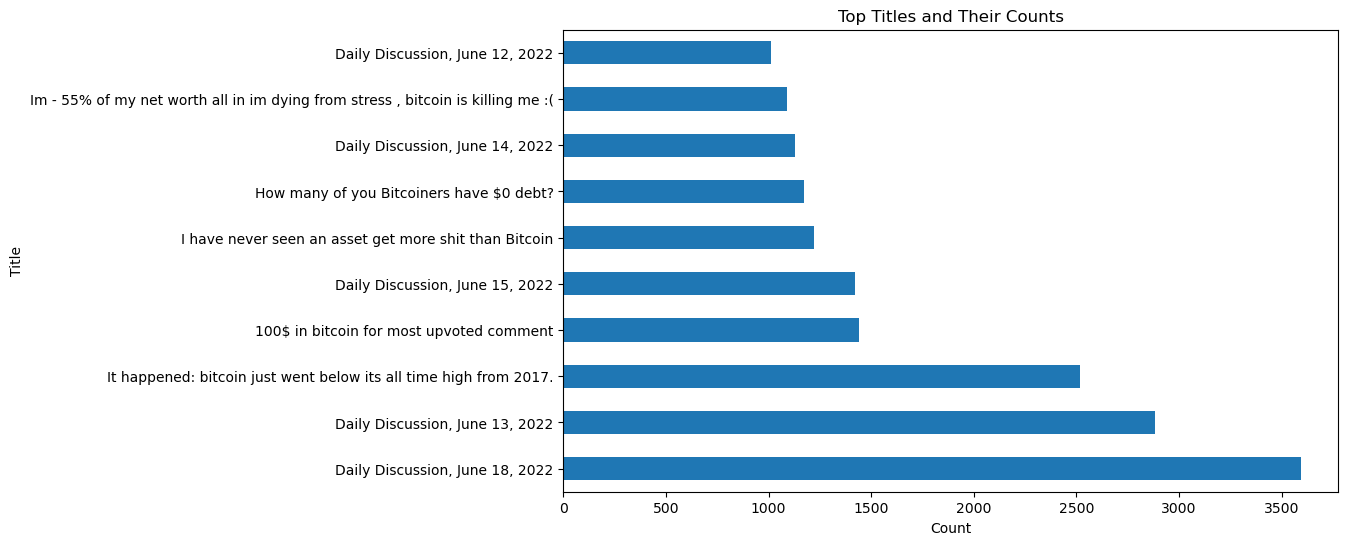

In [17]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
Title_unique = merged_df['title'].value_counts()

# Plot the unique title counts horizontally
plt.figure(figsize=(10, 6))
Title_unique[:10].plot(kind='barh')  # Use 'barh' for horizontal bar plot
plt.title('Top Titles and Their Counts')
plt.ylabel('Title')
plt.xlabel('Count')
plt.show()